In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from pathlib import Path
import sys

sys.path.insert(1, str(Path().cwd().parent))
import common_config

In [3]:
common_config.figure_journal_basic()

In [4]:
sys.path.append('/Users/mamba/Documents') #TODO: replace with direct import
import Code.pertpy.pertpy as pt

In [5]:
#import pertpy as pt
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sns
from gprofiler import GProfiler

In [6]:
fc_associations_df = pd.read_csv("dialogue_output/fc_associations.csv", index_col=0)
fc_associations_df.head(10)

,mcp_0,mcp_1,mcp_2,mcp_3,mcp_4,mcp_5
AT1,0.987296,0.732264,0.576923,0.140111,0.982929,0.985627
AT2,0.987296,0.732264,0.884549,0.684876,0.982929,0.985627
Aberrant Basaloid,0.987296,0.732264,0.626813,0.173580,0.982929,0.985627
Basal,0.987296,0.732264,0.626813,0.181589,0.982929,0.985627
Ciliated,0.987296,0.732264,0.774174,0.140111,0.982929,0.985627
Secretory,0.987296,0.767196,0.626813,0.174454,0.982929,0.985627
capillary EC,0.987296,0.732264,0.288848,0.140111,0.982929,0.985627
ectopic EC,0.987296,0.732264,0.626813,0.187512,0.982929,0.985627
lymphatic EC,0.987296,0.732264,0.626813,0.133915,0.982929,0.985627
Fibroblasts,0.987296,0.732264,0.842231,0.187512,0.982929,0.985627


In [7]:
cmp4_associations_df = pd.read_csv("dialogue_output/cmp4_associations.csv", index_col=0)
cmp4_associations_df.head(10)

,mcp_0,mcp_1,mcp_2,mcp_3,mcp_4,mcp_5
AT1,0.983856,0.932372,0.981531,0.697733,0.985454,0.999969
AT2,0.983856,0.959037,0.981531,0.976912,0.985454,0.999969
Aberrant Basaloid,0.983856,0.932372,0.981531,0.625120,0.985454,0.999969
Basal,0.983856,0.940059,0.981531,0.697733,0.985454,0.999969
Ciliated,0.983856,0.932372,0.981531,0.625120,0.985454,0.999969
Secretory,0.983856,0.932372,0.981531,0.697733,0.985454,0.999969
capillary EC,0.983856,0.932372,0.981531,0.723544,0.985454,0.999969
ectopic EC,0.983856,0.932372,0.981531,0.697733,0.985454,0.999969
lymphatic EC,0.983856,0.932372,0.981531,0.697733,0.985454,0.999969
Fibroblasts,0.983856,0.932372,0.981531,0.625120,0.985454,0.999969


In [8]:
nintedanib_associations_df = pd.read_csv("dialogue_output/nintedanib.csv", index_col=0)
nintedanib_associations_df.head(10)

,mcp_0,mcp_1,mcp_2,mcp_3,mcp_4,mcp_5
AT1,0.983472,0.686173,0.732130,0.151546,0.946320,0.949496
AT2,0.983472,0.791126,0.732130,0.186364,0.922673,0.949496
Aberrant Basaloid,0.983472,0.686173,0.732130,0.186364,0.922673,0.949496
Basal,0.983472,0.794626,0.732130,0.181716,0.946320,0.949496
Ciliated,0.983472,0.686173,0.736432,0.181716,0.922673,0.949496
Secretory,0.983472,0.791126,0.732130,0.186364,0.946320,0.949496
capillary EC,0.983472,0.686173,0.636835,0.090626,0.922673,0.949496
ectopic EC,0.983472,0.791126,0.732130,0.151546,0.922673,0.949496
lymphatic EC,0.983472,0.686173,0.732130,0.090626,0.922673,0.949496
Fibroblasts,0.983472,0.686173,0.736432,0.181716,0.922673,0.949496


# Explore MCP scores per treatment and cell type

In [9]:
adata = sc.read_h5ad("/Users/mamba/Downloads/dialogue_lang.h5ad")

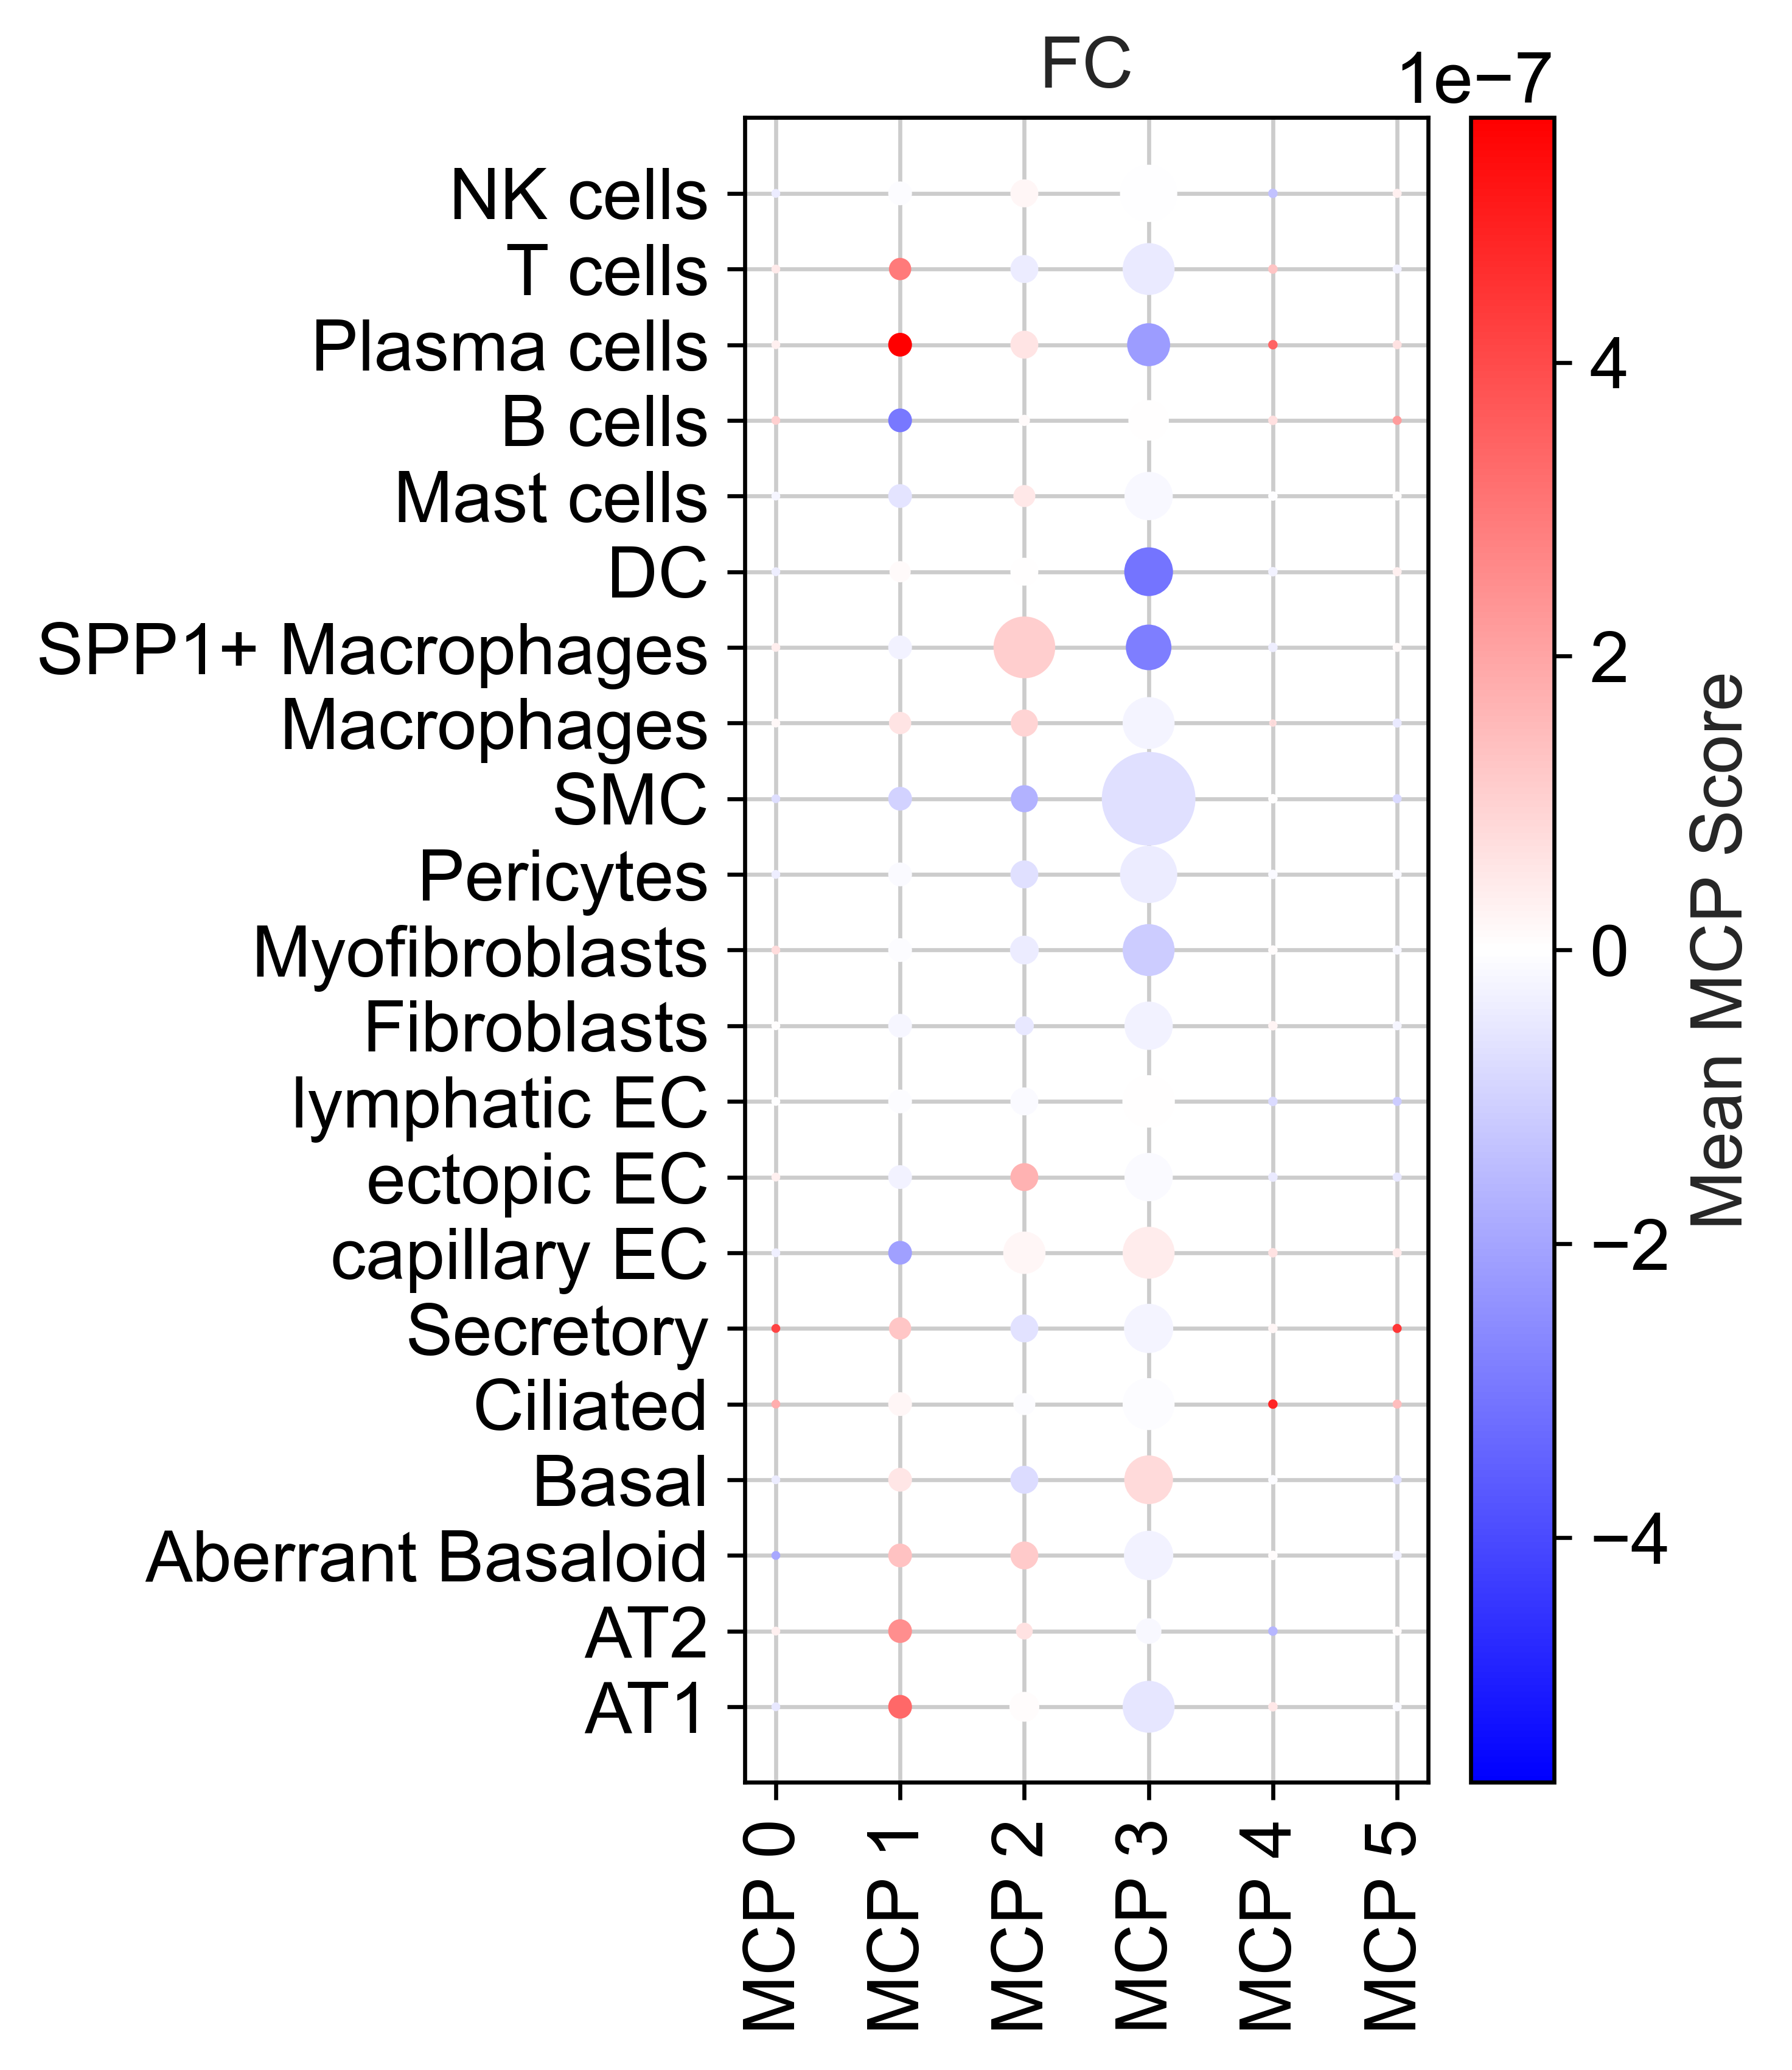

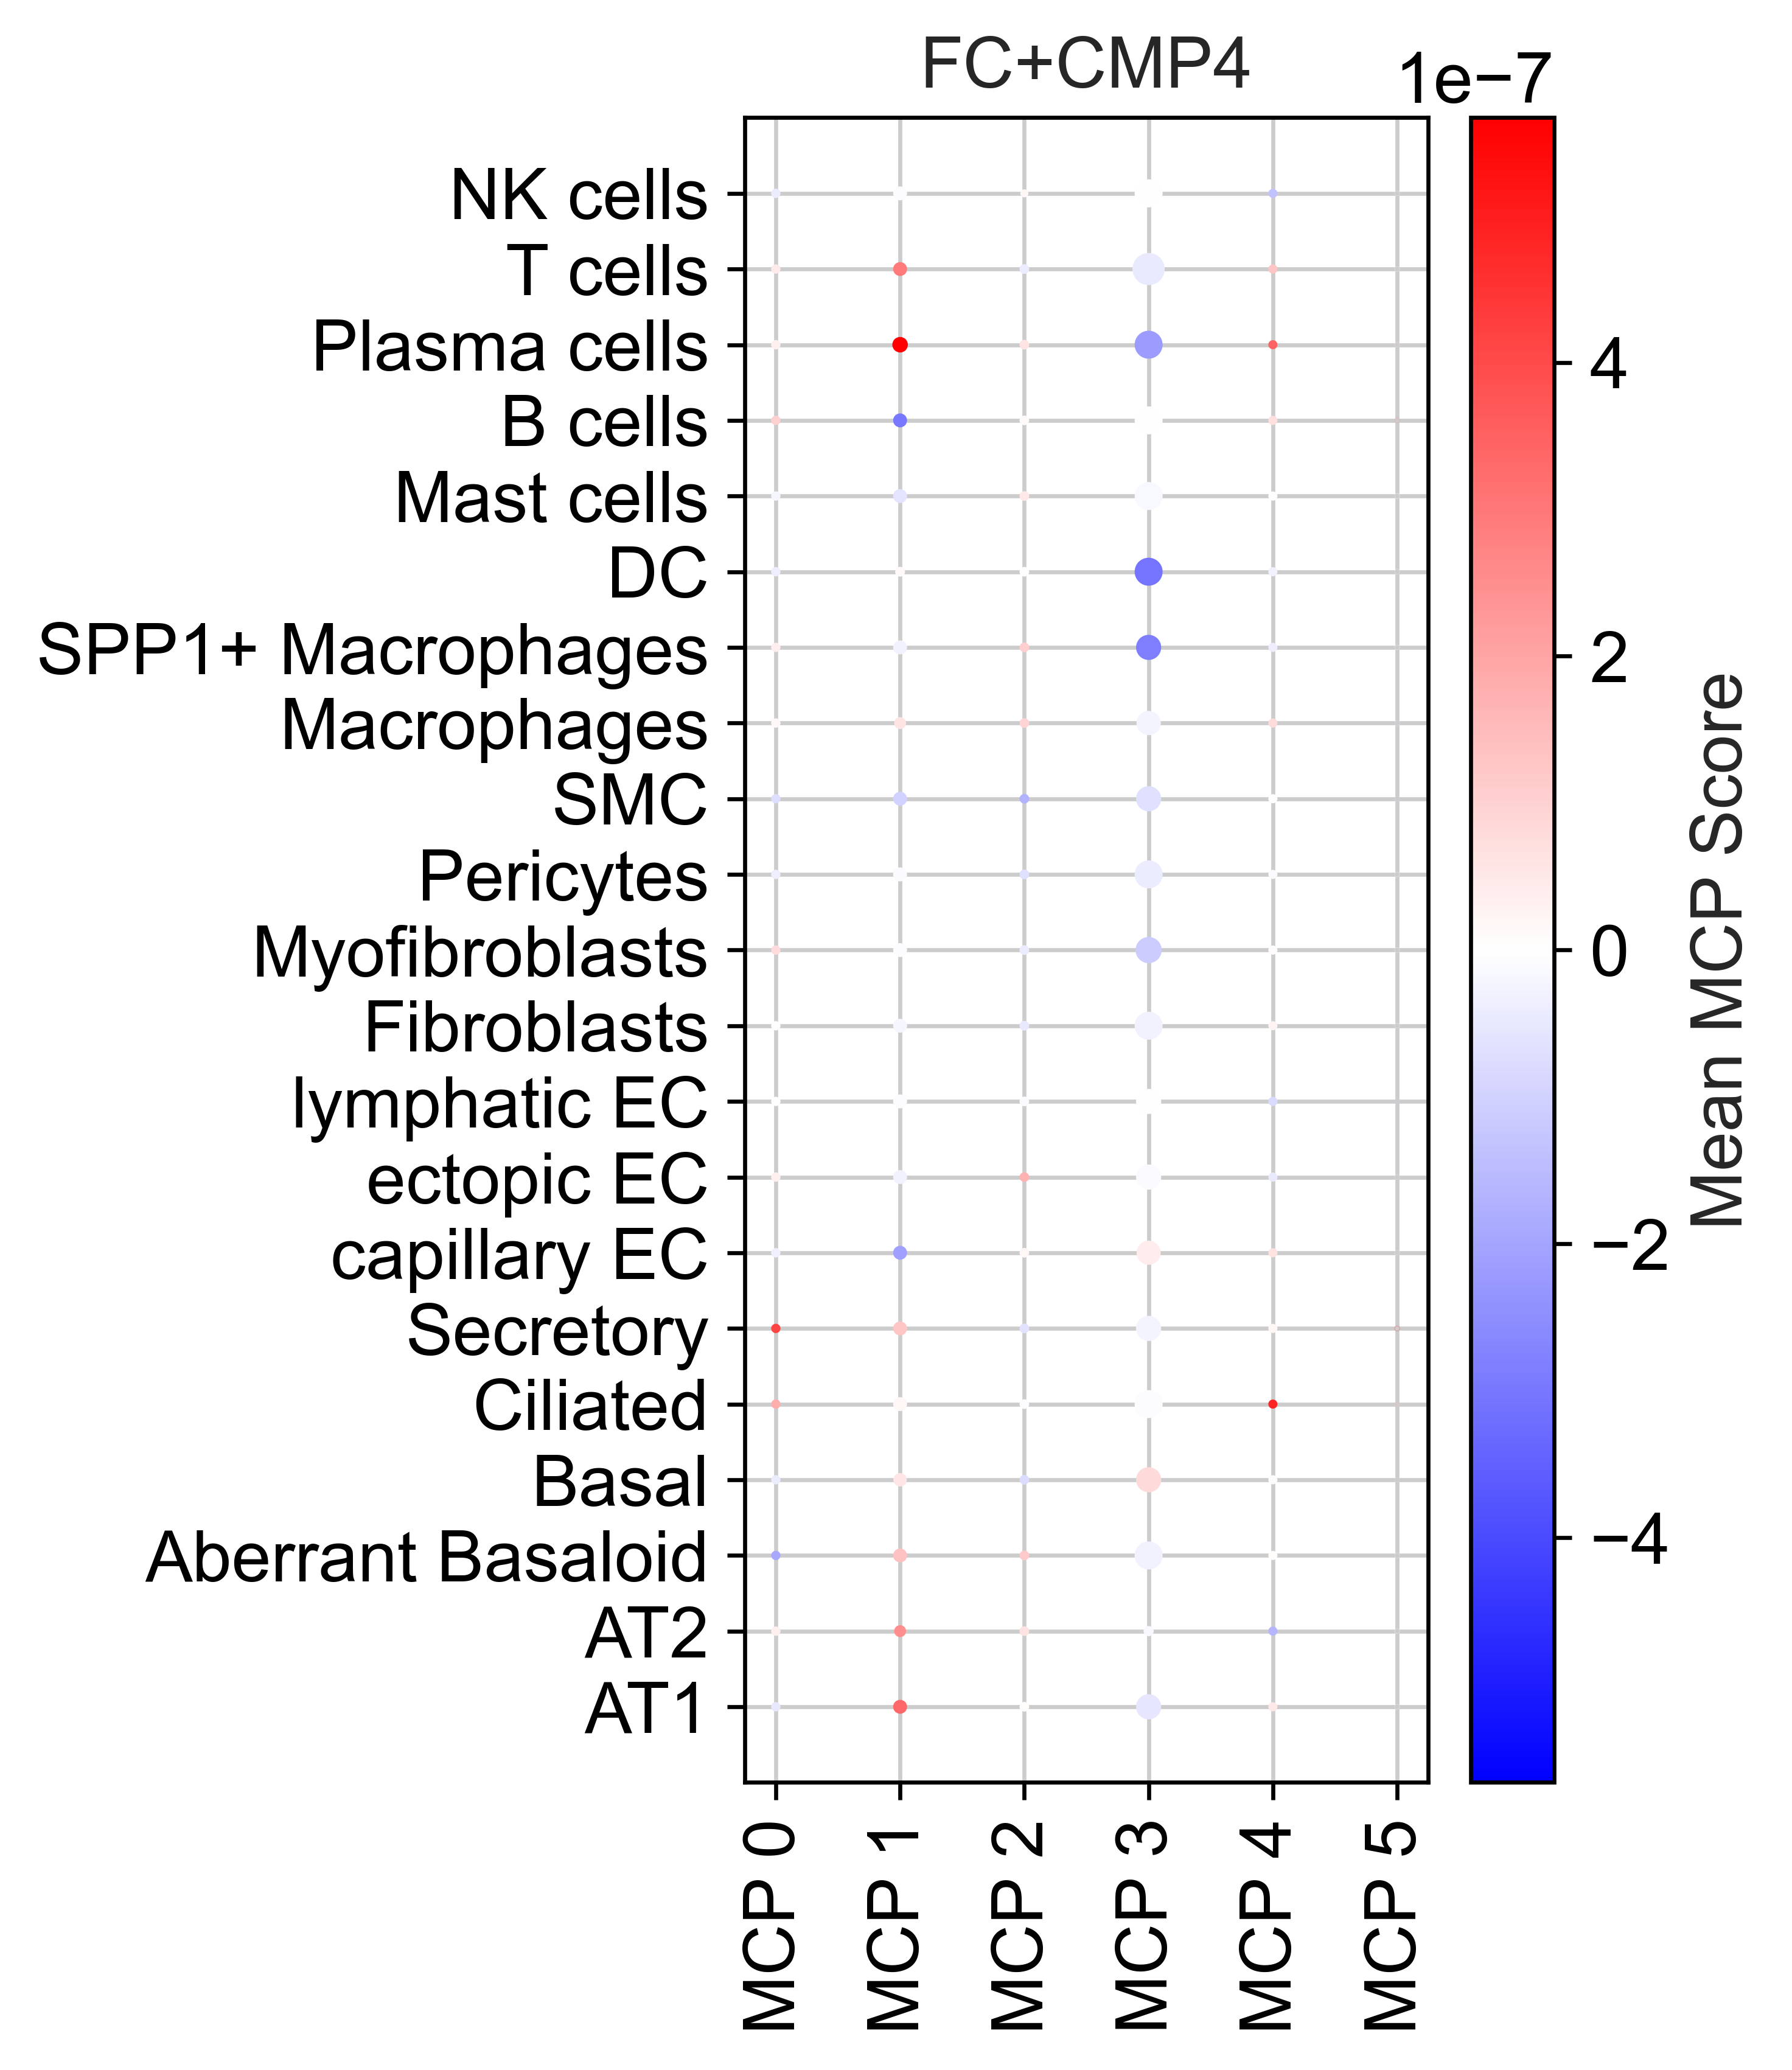

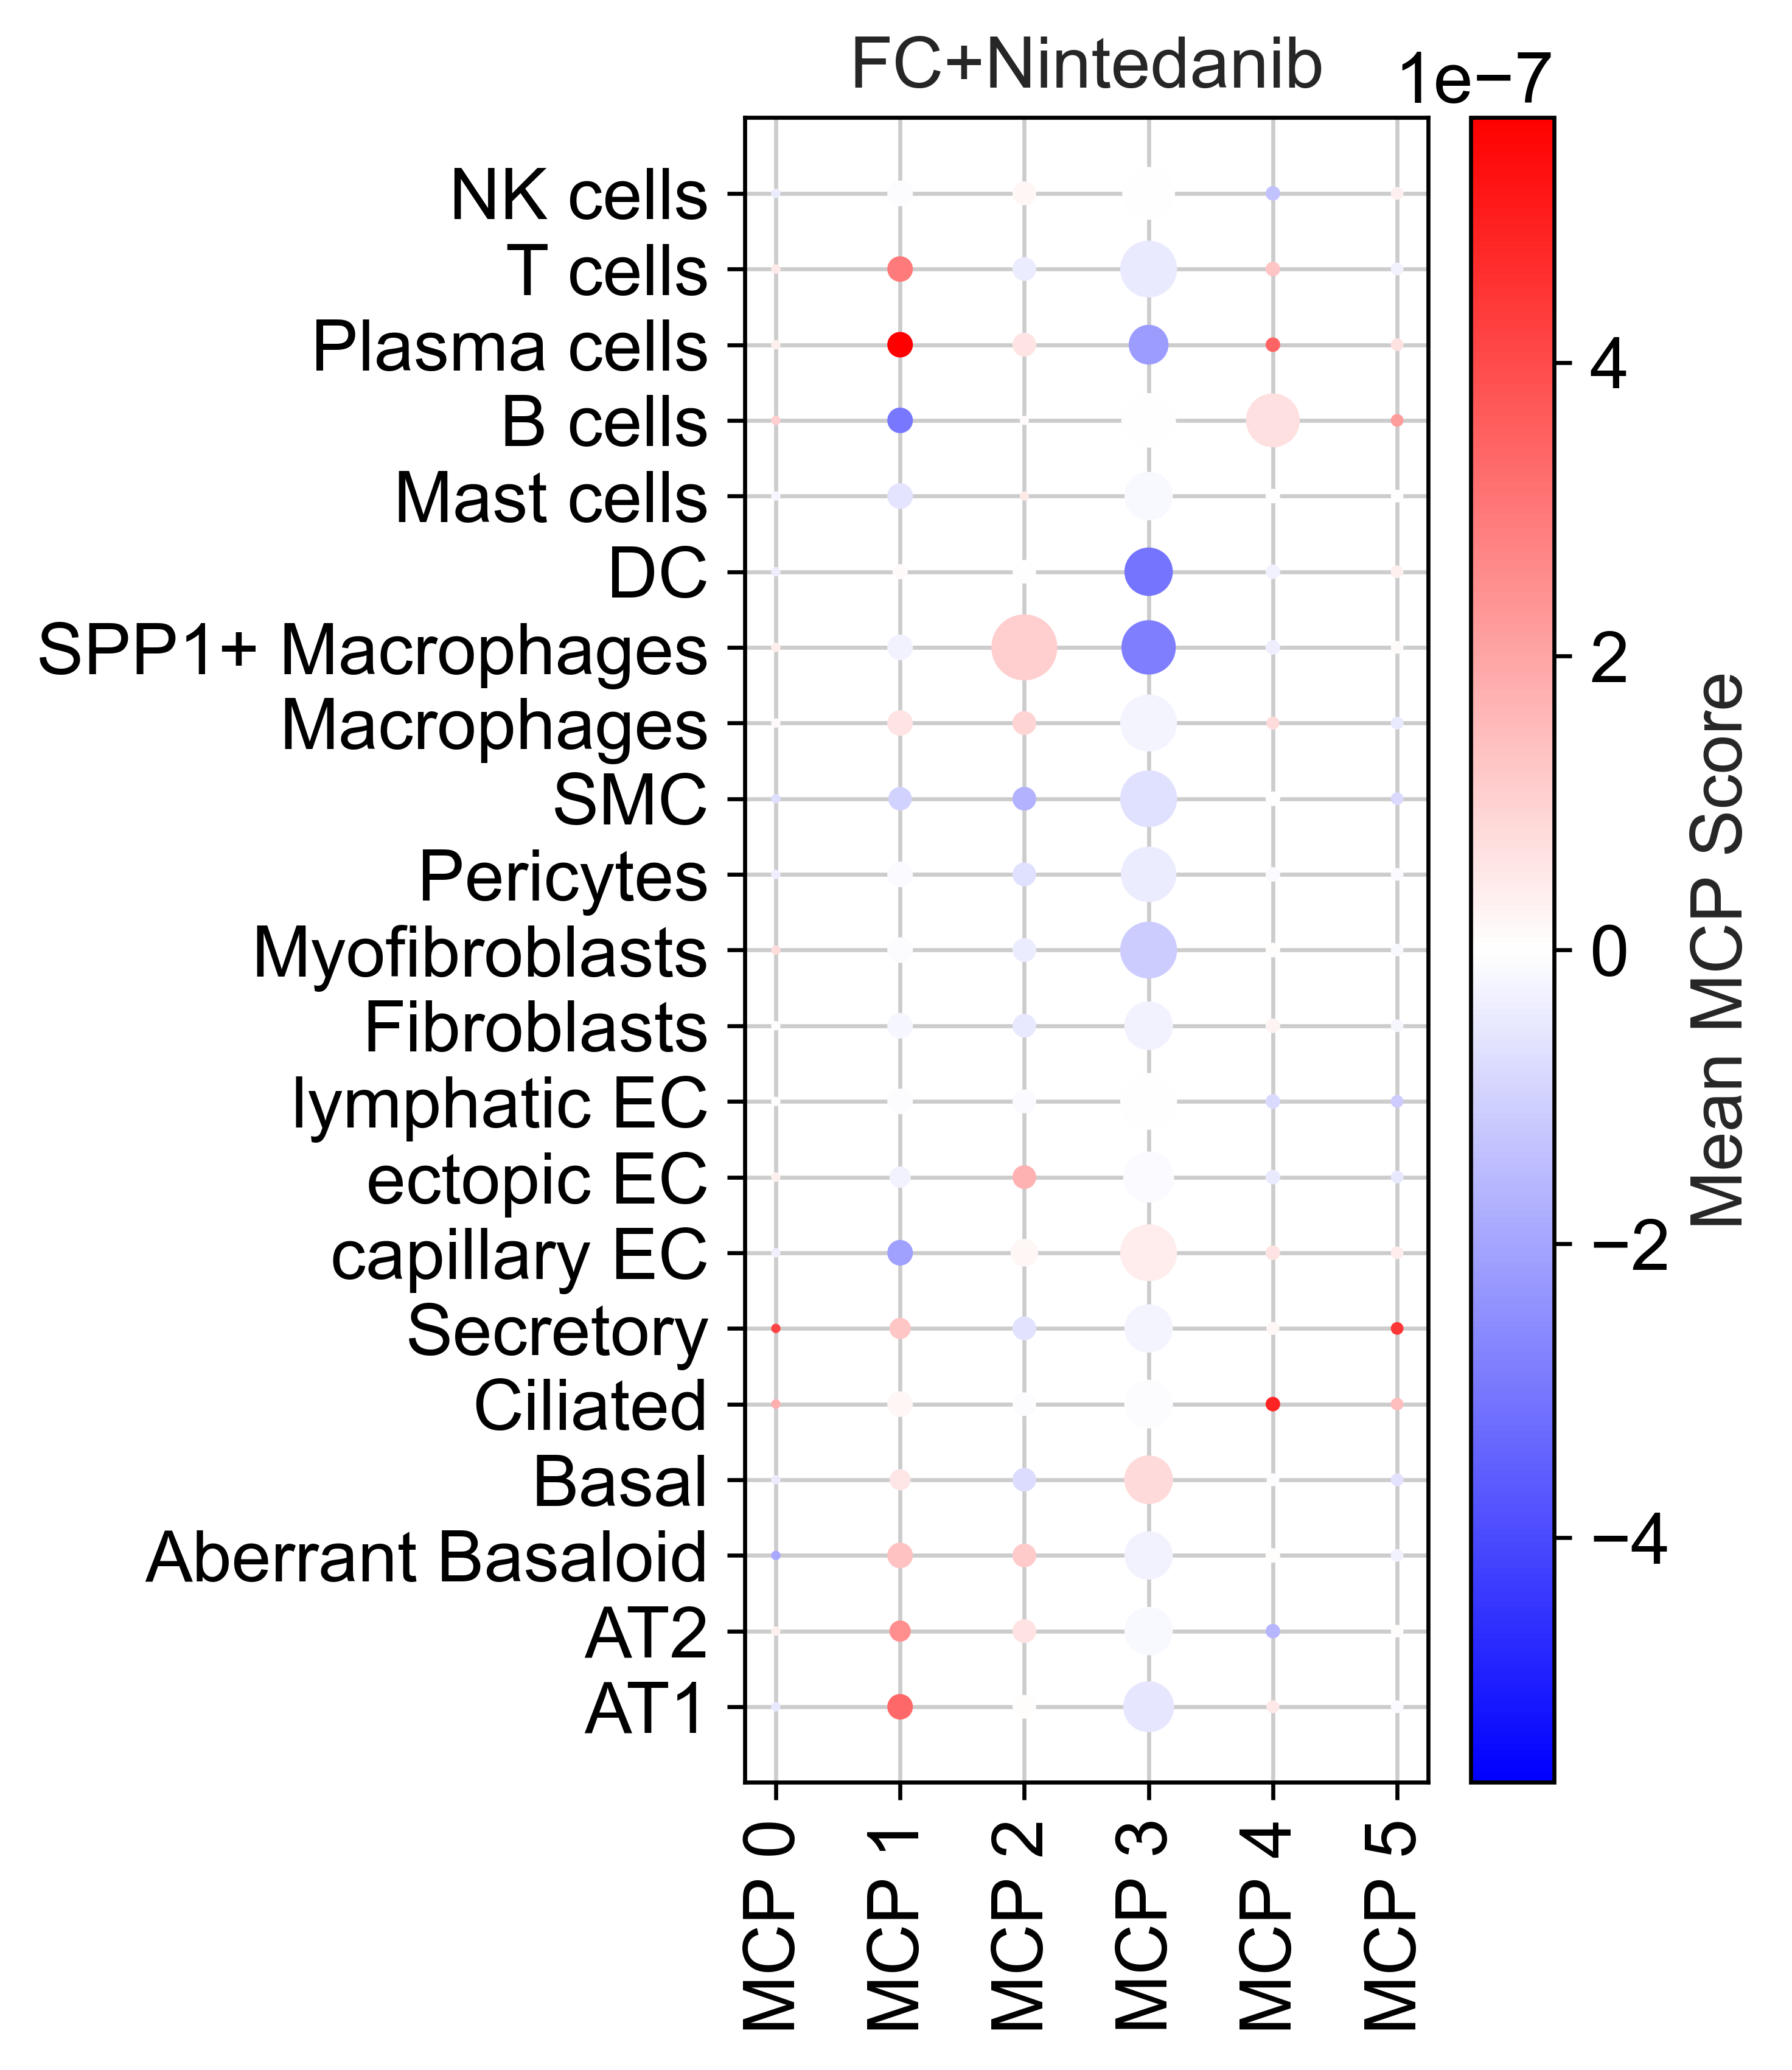

In [46]:
cell_types = fc_associations_df.index

for treatment, associations_df in zip(["FC", "FC+CMP4", "FC+Nintedanib"], [fc_associations_df, cmp4_associations_df, nintedanib_associations_df]):
    plot_df = {"Treatment": [], "Cell type": [], "y_pos": [], "MCP":[], "Mean MCP Score": [], "x_pos": [], "Significance": [], "-log10(p)":[]}
    
    for mcp_nr in range(6):
        for ct_nr, cell_type in enumerate(cell_types):
            plot_df["Treatment"].append(treatment)
            plot_df["Cell type"].append(cell_type)
            plot_df["y_pos"].append(ct_nr)
            plot_df["MCP"].append(f"MCP {mcp_nr}")
            plot_df["Mean MCP Score"].append(adata[adata.obs["cell_type"] == cell_type].obs[f"mcp_{mcp_nr}"].mean())
            plot_df["x_pos"].append(mcp_nr)
            plot_df["Significance"].append(associations_df.loc[cell_type, f"mcp_{mcp_nr}"] < 0.1)
            plot_df["-log10(p)"].append(-1 * np.log10(associations_df.loc[cell_type, f"mcp_{mcp_nr}"]))

    plot_df = pd.DataFrame(plot_df)
    
    plt.figure(figsize=(3, 6))
    #plt.scatter(plot_df["x_pos"], plot_df["y_pos"], s=plot_df["Mean MCP Score"]*1000, c=plot_df["Significance"], cmap="coolwarm") #
    max = abs(plot_df["Mean MCP Score"]).max()
    plt.scatter(plot_df["x_pos"], plot_df["y_pos"], s=plot_df["-log10(p)"]*100, c=plot_df["Mean MCP Score"], cmap="bwr", vmin=-max, vmax=max)
    plt.xticks(range(6), [f"MCP {i}" for i in range(6)], rotation=90)
    plt.yticks(range(len(cell_types)), cell_types)
    plt.title(treatment)
    cbar = plt.colorbar()
    #add cbar label
    cbar.set_label("Mean MCP Score")
    plt.show()

In [47]:
plot_df

,Treatment,Cell type,y_pos,MCP,Mean MCP Score,x_pos,Significance,-log10(p)
0,FC+Nintedanib,AT1,0,MCP 0,-4.988579e-08,0,False,0.007238
1,FC+Nintedanib,AT2,1,MCP 0,3.172382e-08,0,False,0.007238
2,FC+Nintedanib,Aberrant Basaloid,2,MCP 0,-1.936064e-07,0,False,0.007238
3,FC+Nintedanib,Basal,3,MCP 0,-4.202344e-08,0,False,0.007238
4,FC+Nintedanib,Ciliated,4,MCP 0,1.773834e-07,0,False,0.007238
...,...,...,...,...,...,...,...,...
121,FC+Nintedanib,Mast cells,16,MCP 5,8.659733e-11,5,False,0.022507
122,FC+Nintedanib,B cells,17,MCP 5,2.177522e-07,5,False,0.022507
123,FC+Nintedanib,Plasma cells,18,MCP 5,6.272103e-08,5,False,0.022507
124,FC+Nintedanib,T cells,19,MCP 5,-2.968137e-08,5,False,0.022507


In [56]:
def plot_heatmap(associations_df, vmax=None, create_fig=True, cbar=True, cmap="viridis"):
    log_associations_df = associations_df.copy()
    for mcp_nr in range(6):
        log_associations_df[f"MCP {mcp_nr + 1}"] = -1 * np.log10(log_associations_df[f"mcp_{mcp_nr}"])
    log_associations_df = log_associations_df.drop(columns=[f"mcp_{mcp_nr}" for mcp_nr in range(6)])
    
    if create_fig:
        plt.figure(figsize=(2.2, 6))
    if cbar:
        sns.heatmap(log_associations_df, vmin=0, vmax=vmax, cbar=True, cmap=cmap)
    else:
        sns.heatmap(log_associations_df, vmin=0, vmax=vmax, cbar=False, cmap=cmap)

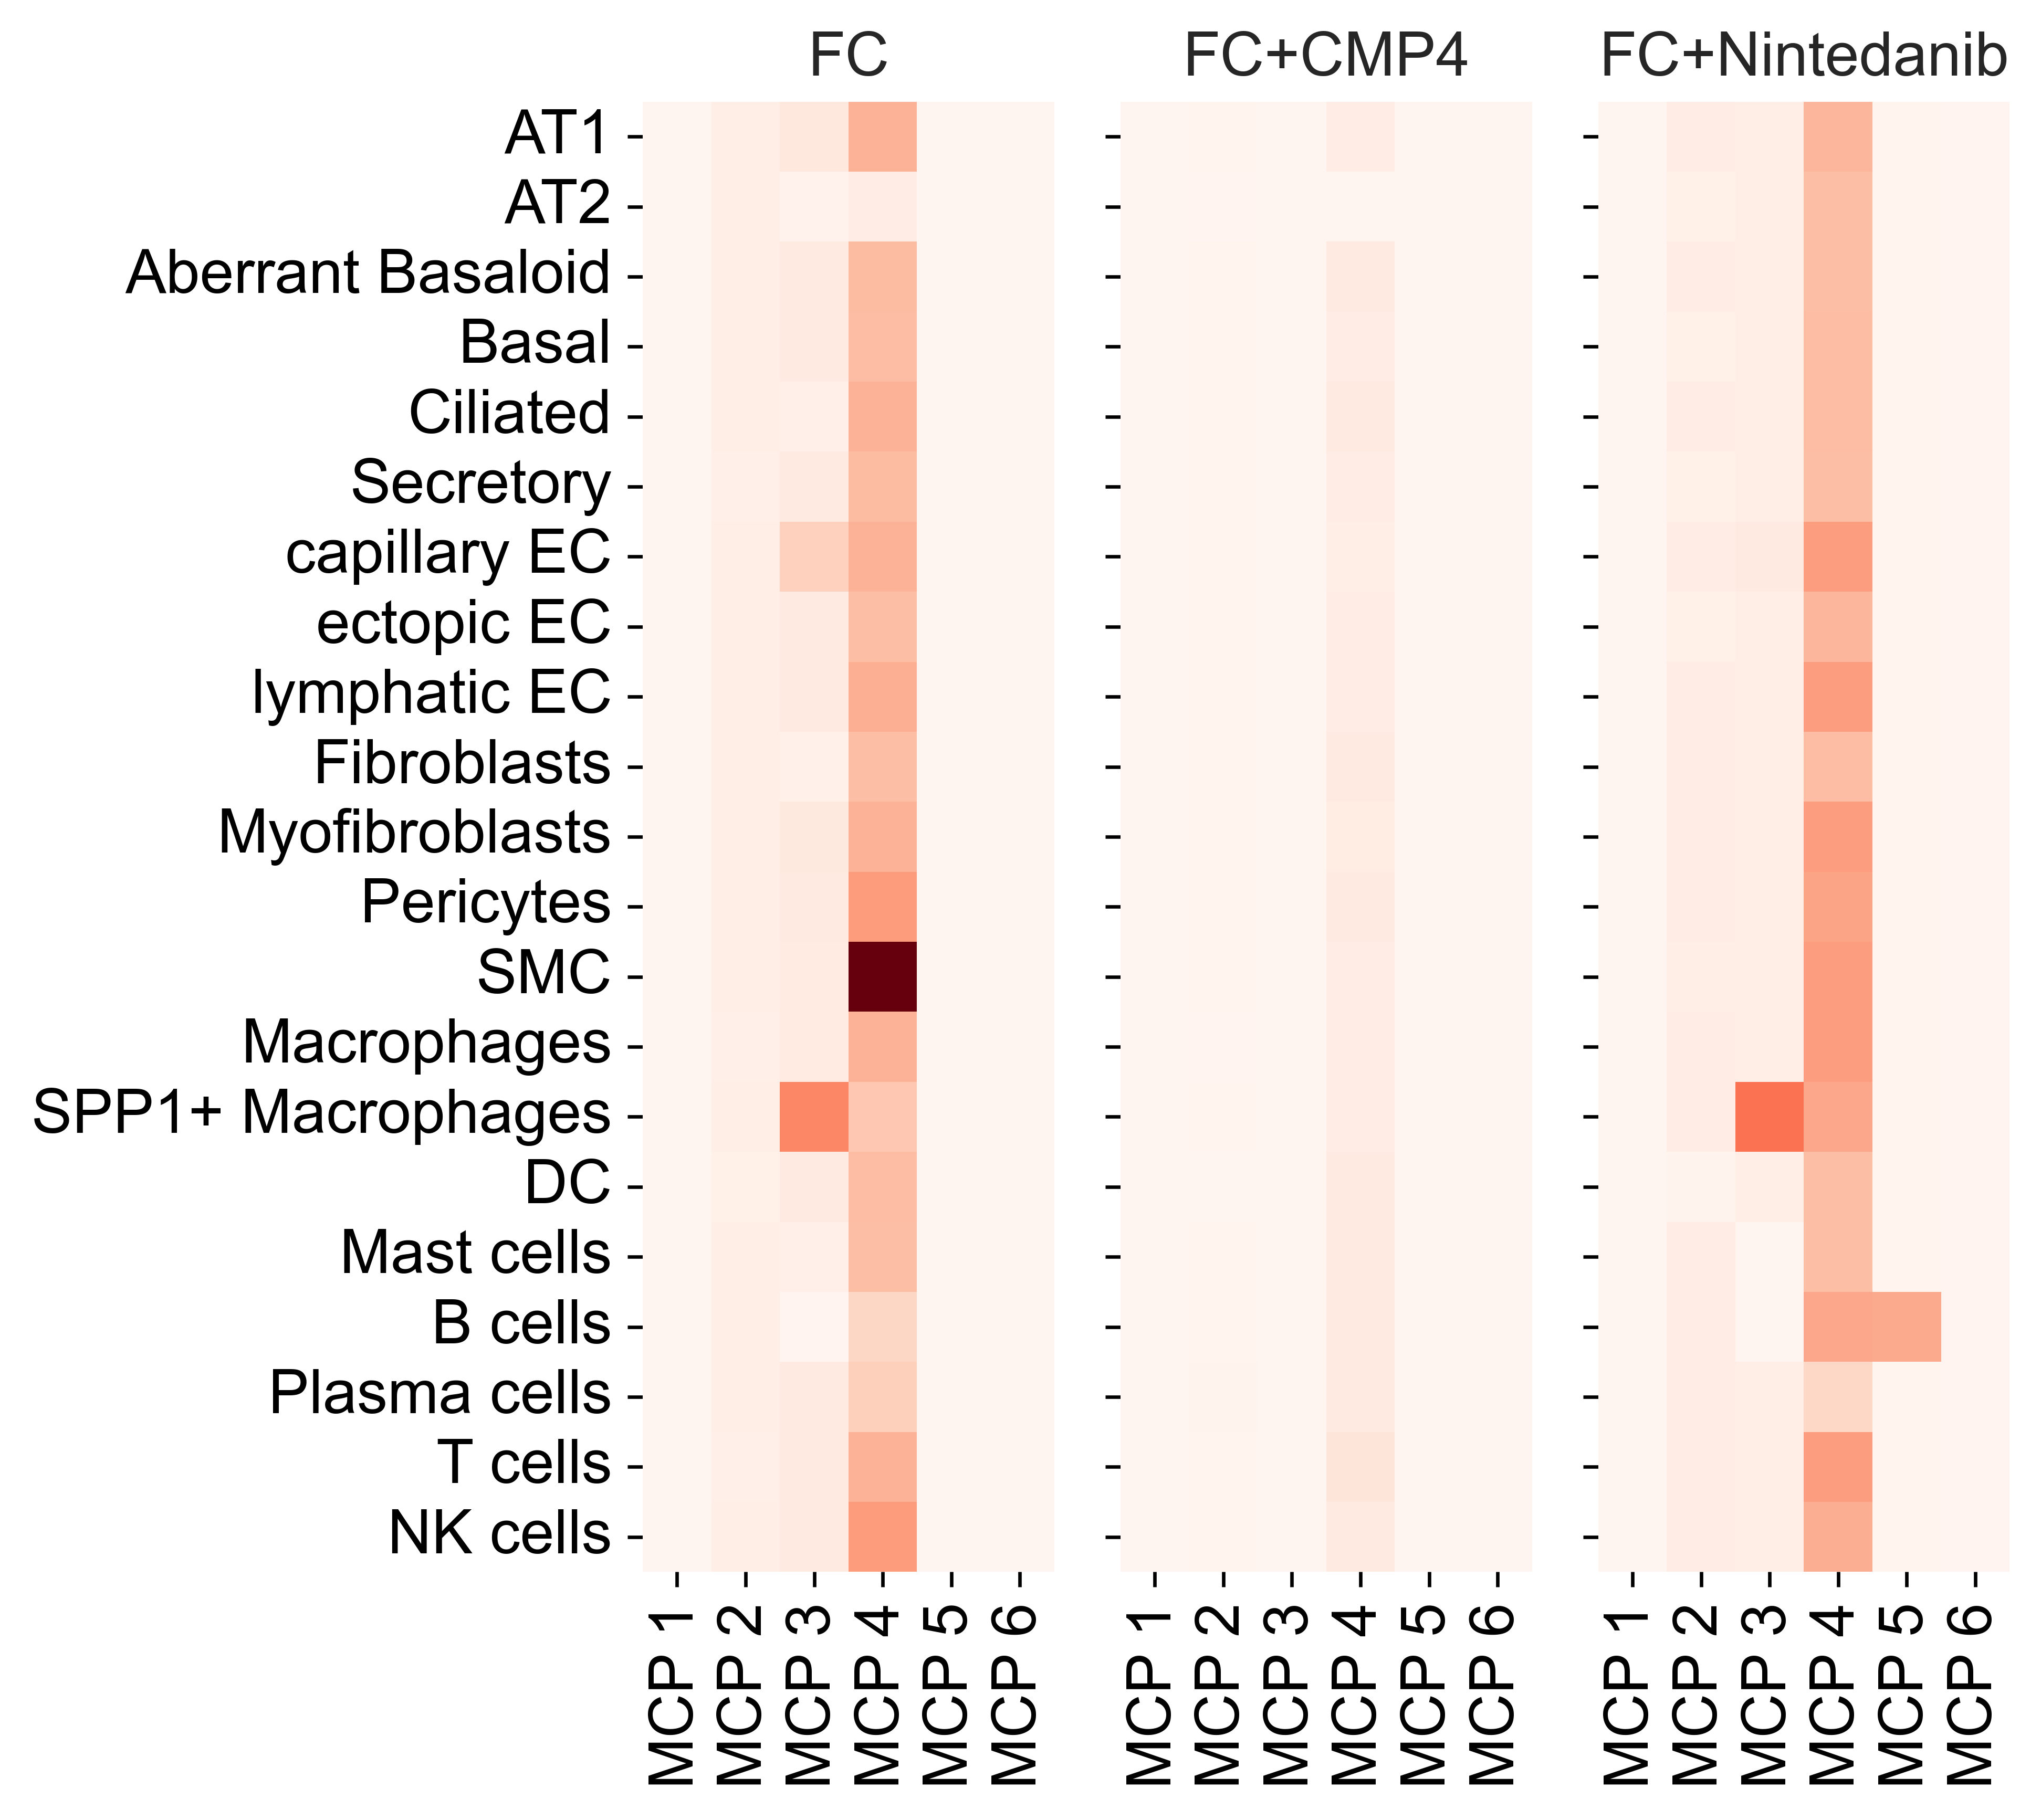

In [60]:
# Plot all three in one plot with subplots, take the global max as vmax
global_max = (-1 * np.log10(fc_associations_df[f"mcp_3"])).max()

plt.subplots(1, 3, figsize=(6.7, 6), sharey=True)
plt.subplot(1, 3, 1)
plot_heatmap(fc_associations_df, vmax=global_max, create_fig=False, cbar=False, cmap="Reds")
plt.title("FC")

plt.subplot(1, 3, 2)
plot_heatmap(cmp4_associations_df, vmax=global_max, create_fig=False, cbar=False, cmap="Reds")
plt.title("FC+CMP4")

plt.subplot(1, 3, 3)
plot_heatmap(nintedanib_associations_df, vmax=global_max, create_fig=False, cbar=False, cmap="Reds")
plt.title("FC+Nintedanib")
plt.tight_layout()

plt.savefig("figures/heatmap_mcp_associations.pdf")
plt.show()

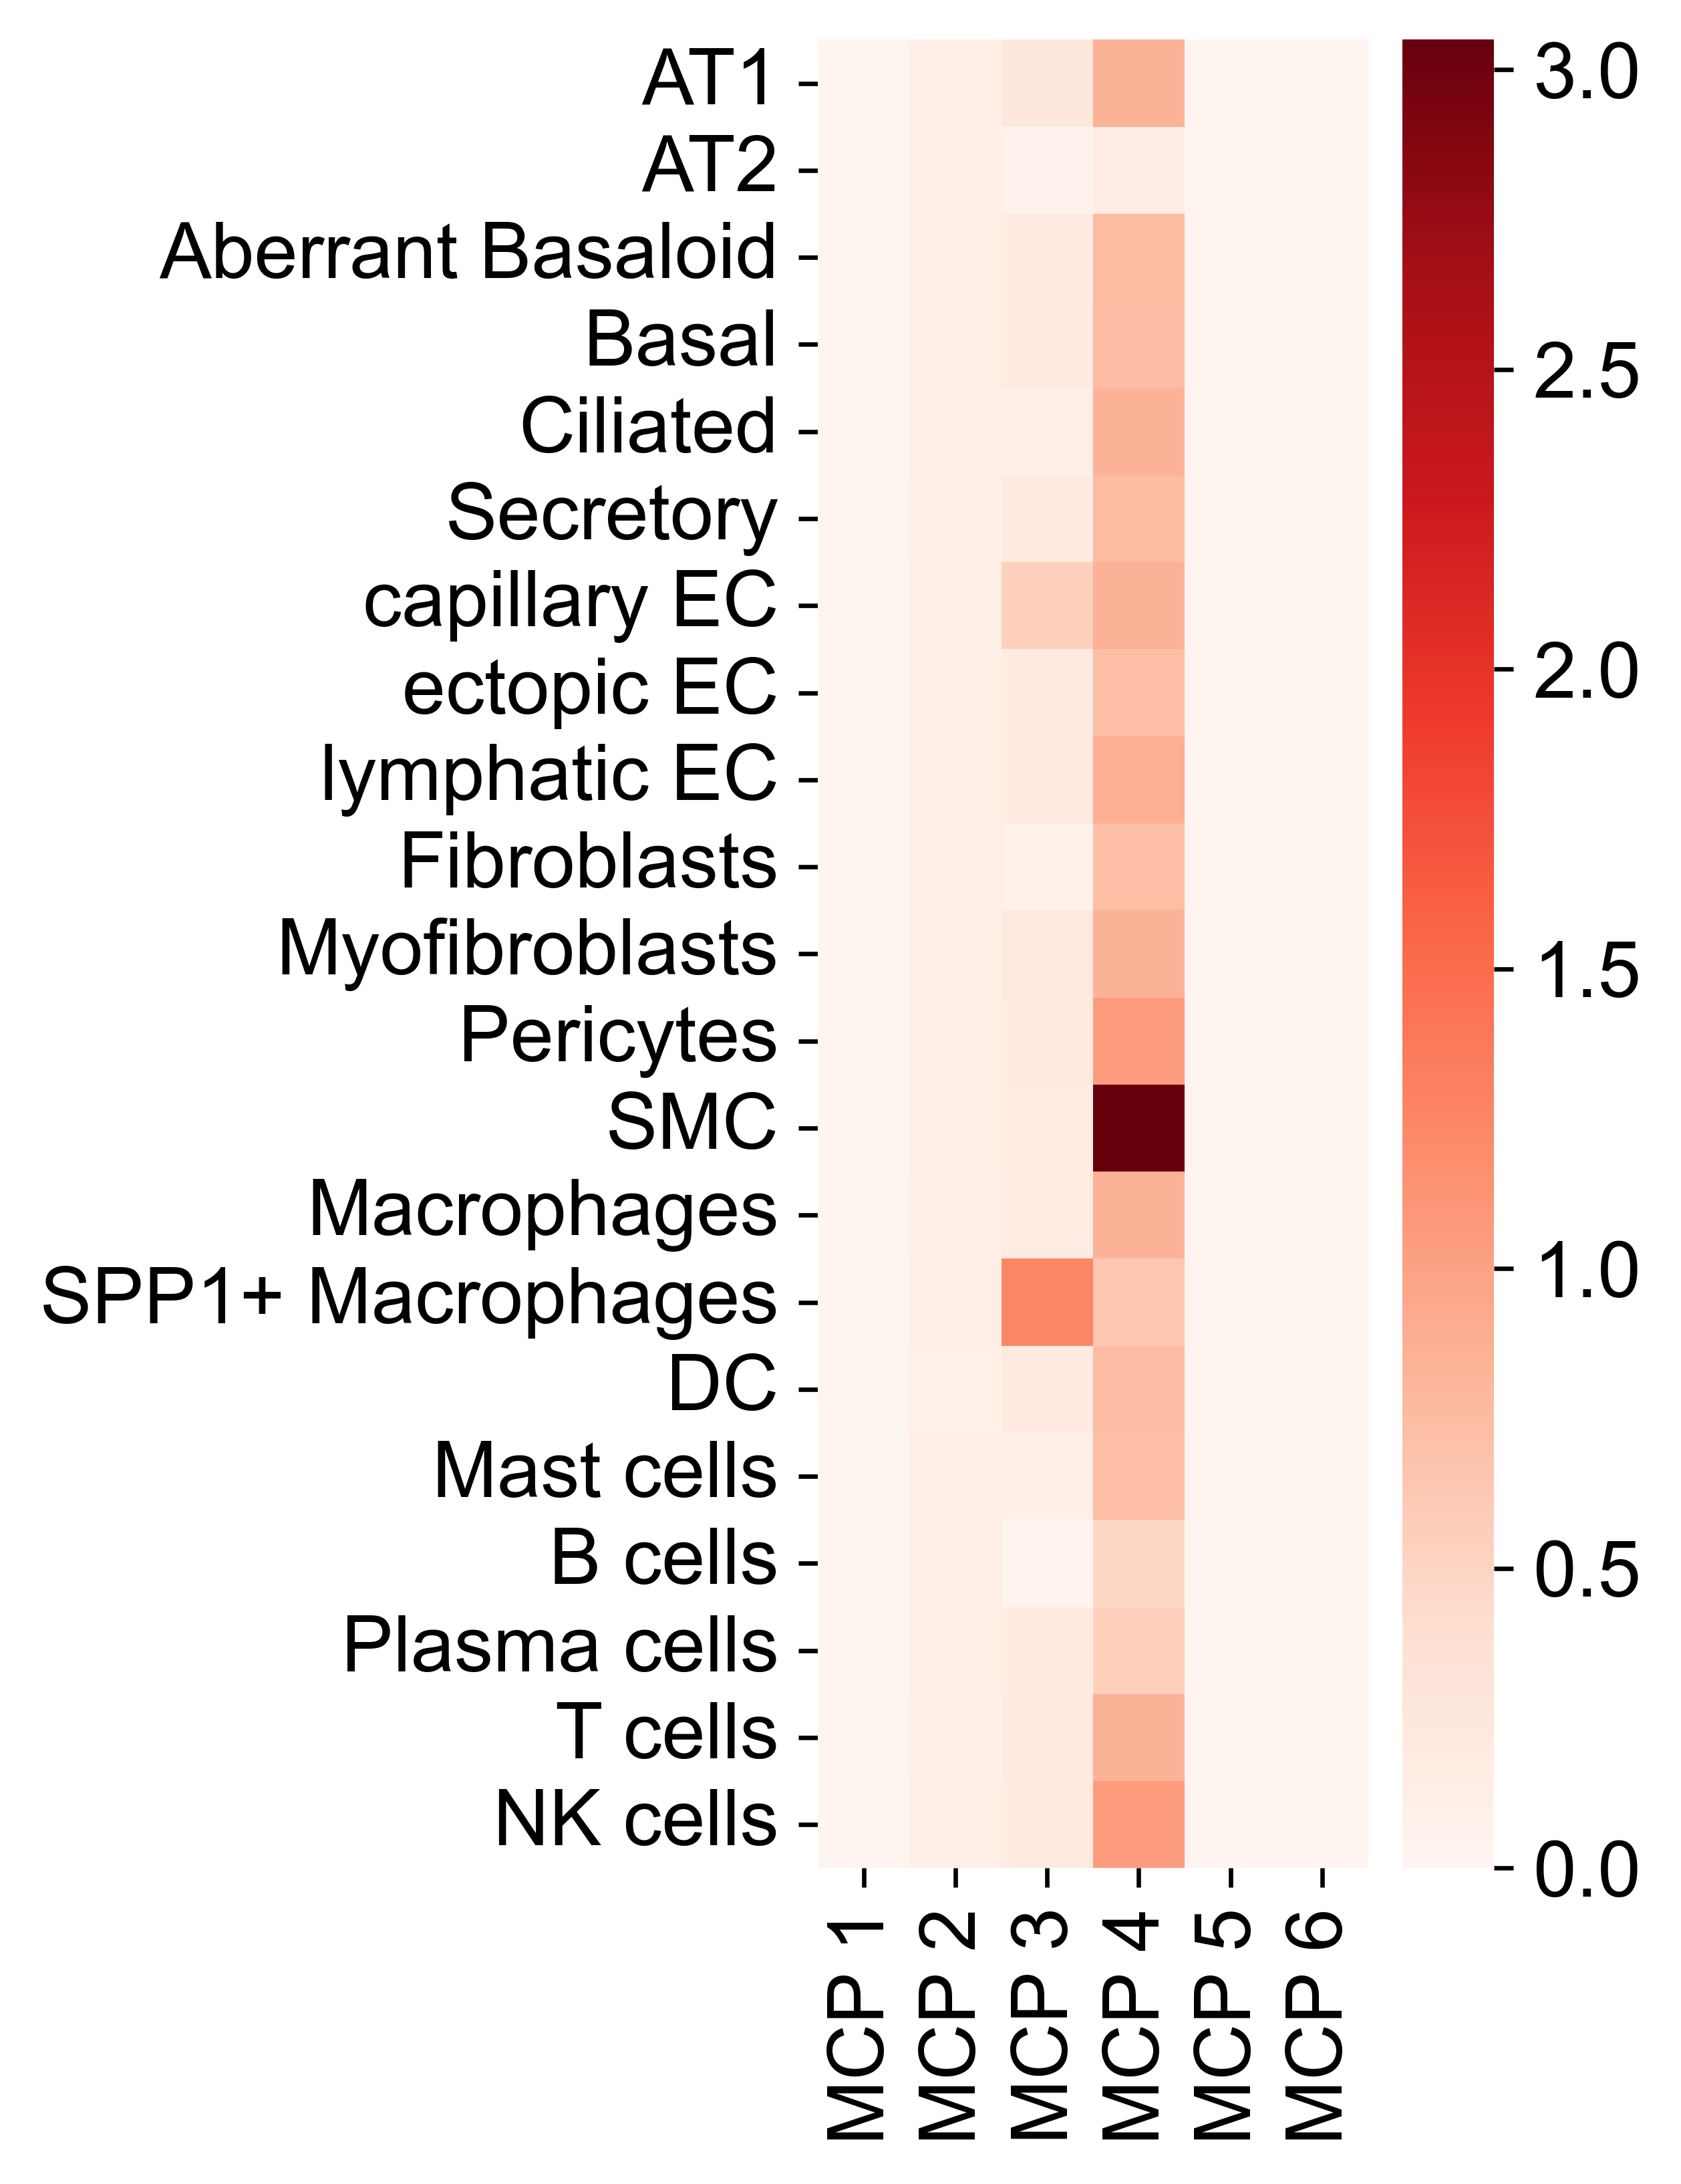

In [62]:
# Save one plot for the colorbar
plot_heatmap(fc_associations_df, vmax=global_max, create_fig=True, cbar=True, cmap="Reds")
plt.savefig("figures/heatmap_mcp_associations_colorbar.pdf", bbox_inches="tight")

# Extrema genes

In [10]:
extrema_genes = pd.read_pickle("dialogue_output/extrema_genes.pickle")

In [52]:
extrema_genes_dict = {}

for cell_type in extrema_genes["mcp_3"].keys():
    extrema_genes_dict[cell_type] = extrema_genes["mcp_3"][cell_type]["names"].tolist()[:100]
    
df = pd.DataFrame(extrema_genes_dict)
df.to_csv("dialogue_output/MCP3_genes.csv")

In [16]:
extrema_genes["mcp_3"]["AT1"]

,names,scores,logfoldchanges,pvals,pvals_adj
0,SFTPB,12.877455,7.953697,3.894661e-17,2.346274e-13
1,HOPX,10.641792,3.321976,2.076951e-17,1.876837e-13
2,SFTA2,10.174920,4.488100,2.707977e-15,9.788255e-12
3,SFTPA1,9.849520,7.391253,5.680801e-13,1.679333e-09
4,AGR2,8.940668,4.337170,6.504362e-13,1.679333e-09
...,...,...,...,...,...
18068,BIRC3,-6.407055,-30.332541,8.499617e-08,9.036092e-05
18069,PMEPA1,-7.800420,-7.307940,7.032006e-10,1.059079e-06
18070,C15orf48,-8.406758,-10.072741,1.048389e-10,2.368441e-07
18071,LAMC2,-9.892865,-4.419807,1.487599e-15,6.721342e-12


In [17]:
extrema_genes["mcp_1"]["AT1"]

,names,scores,logfoldchanges,pvals,pvals_adj
0,CCND1,14.498676,4.570683,4.811220e-25,8.695319e-21
1,KRT19,14.116709,4.550196,7.977519e-24,7.208885e-20
2,PHLDA2,13.007106,4.868038,7.095402e-21,4.274507e-17
3,KRT8,11.959324,3.559841,2.183778e-18,6.577905e-15
4,KRT18,11.754119,3.610178,6.413246e-19,2.318132e-15
...,...,...,...,...,...
18068,HLA-A,-5.694044,-3.173983,2.986650e-07,6.425920e-05
18069,SOD2,-5.883142,-31.509558,5.010292e-07,9.950660e-05
18070,C15orf48,-5.985219,-31.638508,3.547750e-07,7.522883e-05
18071,LAMB3,-6.223157,-2.751140,3.126305e-08,8.692570e-06


# GSEA

In [11]:
mcp_genes = {}
for mcp_nr in range(6):
    mcp_genes[f"mcp_{mcp_nr}"] = []
    for cell_type in extrema_genes[f"mcp_{mcp_nr}"].keys():
        df = extrema_genes[f"mcp_{mcp_nr}"][cell_type]
        df = df[df["pvals_adj"] < 0.0001]
        mcp_genes[f"mcp_{mcp_nr}"].extend(df["names"].values)
    print(f"mcp_{mcp_nr}: {len(set(mcp_genes[f'mcp_{mcp_nr}']))} genes")

mcp_0: 9675 genes
mcp_1: 8022 genes
mcp_2: 9055 genes
mcp_3: 6591 genes
mcp_4: 9044 genes
mcp_5: 7603 genes


In [19]:
mcp_genes[f"mcp_3"][:100]

['SFTPB',
 'HOPX',
 'SFTA2',
 'SFTPA1',
 'AGR2',
 'SFTPA2',
 'CEACAM6',
 'NAPSA',
 'CXCL17',
 'AQP3',
 'CYB5A',
 'FBP1',
 'BIRC3',
 'PMEPA1',
 'C15orf48',
 'LAMC2',
 'IL32',
 'CP',
 'PIGR',
 'WFDC2',
 'HLA-DRB1',
 'CD74',
 'AQP3',
 'C3',
 'FOS',
 'TNFSF10',
 'SLPI',
 'HLA-DRA',
 'TMEM45B',
 'MT-CO1',
 'MT-ND3',
 'MT-CYB',
 'SLC34A2',
 'MPZL2',
 'MT-ATP6',
 'CEBPD',
 'SFTPB',
 'CSF3R',
 'AGR2',
 'HLA-DPA1',
 'MT-ND4',
 'TCIM',
 'WSB1',
 'CXCL17',
 'MT-CO2',
 'CYB5A',
 'C1R',
 'C1S',
 'MT-CO3',
 'ZMYND8',
 'GADD45G',
 'LGALS3BP',
 'SLC25A37',
 'CST3',
 'ELF3',
 'UCP2',
 'ERBB3',
 'SFTPA2',
 'DRAM1',
 'EHF',
 'EPS8',
 'ARFGEF3',
 'XBP1',
 'HLA-DPB1',
 'PDIA3',
 'C2',
 'HLA-DRB5',
 'TCF7L1',
 'NRGN',
 'ANXA4',
 'C1RL',
 'HLA-DQB1',
 'IFITM3',
 'CD9',
 'GPRC5C',
 'DPYD',
 'INSIG1',
 'S100A9',
 'TST',
 'CHI3L1',
 'CRTAC1',
 'STEAP4',
 'ATP1A1',
 'CAT',
 'APLP2',
 'CLDN4',
 'ITGA3',
 'PPIB',
 'CD302',
 'YIPF3',
 'TMC5',
 'MUC1',
 'LRP5',
 'CAPN8',
 'CFI',
 'NAPSA',
 'NFIA',
 'CFTR',
 'CALR',


## Across cell types, all significant genes

In [12]:
gp = GProfiler(return_dataframe=True)

gsea_results = {}
for mcp_nr in range(6):
    results = gp.profile(organism='hsapiens',
                query=mcp_genes[f"mcp_{mcp_nr}"])
    gsea_results[f"mcp_{mcp_nr}"] = results

In [13]:
gsea_results["mcp_0"]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:MF,GO:0005515,protein binding,4.940656e-324,True,"""Binding to a protein."" [GOC:go_curators]",14838,9163,8075,20212,0.881262,0.544211,query_1,[GO:0005488]
1,GO:CC,GO:0005737,cytoplasm,4.940656e-324,True,"""The contents of a cell excluding the plasma m...",12345,9163,6912,22097,0.754338,0.559903,query_1,"[GO:0005622, GO:0110165]"
2,GO:CC,GO:0005829,cytosol,3.462492e-312,True,"""The part of the cytoplasm that does not conta...",5487,9163,3480,22097,0.379788,0.634226,query_1,"[GO:0005737, GO:0110165]"
3,HPA,HPA:0300000,lung,1.541228e-289,True,lung,7379,6379,5160,11019,0.808904,0.699282,query_1,[HPA:0000000]
4,TF,TF:M09894_1,Factor: E2F-4; motif: SNGGGCGGGAANN; match cla...,1.581926e-289,True,Factor: E2F-4; motif: SNGGGCGGGAANN; match cla...,14345,9456,7915,20045,0.837035,0.551760,query_1,[TF:M09894]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5480,HP,HP:0002094,Dyspnea,4.924261e-02,True,Difficult or labored breathing. Dyspnea is a s...,482,2774,311,4958,0.112112,0.645228,query_1,[HP:0002793]
5481,GO:BP,GO:0050764,regulation of phagocytosis,4.977168e-02,True,"""Any process that modulates the frequency, rat...",97,8810,61,21031,0.006924,0.628866,query_1,"[GO:0006909, GO:0030100]"
5482,GO:MF,GO:0004715,non-membrane spanning protein tyrosine kinase ...,4.992886e-02,True,"""Catalysis of the reaction: ATP + protein L-ty...",45,9163,33,20212,0.003601,0.733333,query_1,[GO:0004713]
5483,REAC,REAC:R-HSA-111447,Activation of BAD and translocation to mitocho...,4.993108e-02,True,Activation of BAD and translocation to mitocho...,15,5918,15,10842,0.002535,1.000000,query_1,[REAC:R-HSA-114452]


In [14]:
gsea_results["mcp_0"][gsea_results["mcp_0"]["source"] == "REAC"]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
1192,REAC,REAC:R-HSA-2262752,Cellular responses to stress,1.902308e-33,True,Cellular responses to stress,780,5918,589,10842,0.099527,0.755128,query_1,[REAC:R-HSA-8953897]
1194,REAC,REAC:R-HSA-8953897,Cellular responses to stimuli,2.014762e-33,True,Cellular responses to stimuli,794,5918,598,10842,0.101048,0.753149,query_1,[REAC:0000000]
1359,REAC,REAC:R-HSA-72766,Translation,9.656631e-28,True,Translation,292,5918,250,10842,0.042244,0.856164,query_1,[REAC:R-HSA-392499]
1570,REAC,REAC:R-HSA-8953854,Metabolism of RNA,5.889828e-22,True,Metabolism of RNA,701,5918,510,10842,0.086178,0.727532,query_1,[REAC:0000000]
1571,REAC,REAC:R-HSA-72737,Cap-dependent Translation Initiation,6.294487e-22,True,Cap-dependent Translation Initiation,120,5918,115,10842,0.019432,0.958333,query_1,[REAC:R-HSA-72613]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5448,REAC,REAC:R-HSA-350562,Regulation of ornithine decarboxylase (ODC),4.668941e-02,True,Regulation of ornithine decarboxylase (ODC),51,5918,41,10842,0.006928,0.803922,query_1,[REAC:R-HSA-351202]
5473,REAC,REAC:R-HSA-6782210,Gap-filling DNA repair synthesis and ligation ...,4.874098e-02,True,Gap-filling DNA repair synthesis and ligation ...,63,5918,49,10842,0.008280,0.777778,query_1,[REAC:R-HSA-6781827]
5476,REAC,REAC:R-HSA-917937,Iron uptake and transport,4.893555e-02,True,Iron uptake and transport,57,5918,45,10842,0.007604,0.789474,query_1,[REAC:R-HSA-382551]
5478,REAC,REAC:R-HSA-5610780,Degradation of GLI1 by the proteasome,4.909832e-02,True,Degradation of GLI1 by the proteasome,60,5918,47,10842,0.007942,0.783333,query_1,[REAC:R-HSA-5610787]


In [15]:
gsea_results["mcp_3"][gsea_results["mcp_3"]["source"] == "REAC"]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
940,REAC,REAC:R-HSA-72706,GTP hydrolysis and joining of the 60S ribosoma...,1.625141e-29,True,GTP hydrolysis and joining of the 60S ribosoma...,113,4273,104,10842,0.024339,0.920354,query_1,[REAC:R-HSA-72737]
957,REAC,REAC:R-HSA-156827,L13a-mediated translational silencing of Cerul...,3.850814e-29,True,L13a-mediated translational silencing of Cerul...,112,4273,103,10842,0.024105,0.919643,query_1,[REAC:R-HSA-72613]
960,REAC,REAC:R-HSA-168256,Immune System,4.510349e-29,True,Immune System,2052,4273,1044,10842,0.244325,0.508772,query_1,[REAC:0000000]
1001,REAC,REAC:R-HSA-72737,Cap-dependent Translation Initiation,2.001877e-27,True,Cap-dependent Translation Initiation,120,4273,107,10842,0.025041,0.891667,query_1,[REAC:R-HSA-72613]
1002,REAC,REAC:R-HSA-72613,Eukaryotic Translation Initiation,2.001877e-27,True,Eukaryotic Translation Initiation,120,4273,107,10842,0.025041,0.891667,query_1,[REAC:R-HSA-72766]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4873,REAC,REAC:R-HSA-2894862,Constitutive Signaling by NOTCH1 HD+PEST Domai...,4.432896e-02,True,Constitutive Signaling by NOTCH1 HD+PEST Domai...,57,4273,37,10842,0.008659,0.649123,query_1,[REAC:R-HSA-2894858]
4874,REAC,REAC:R-HSA-2894858,Signaling by NOTCH1 HD+PEST Domain Mutants in ...,4.432896e-02,True,Signaling by NOTCH1 HD+PEST Domain Mutants in ...,57,4273,37,10842,0.008659,0.649123,query_1,[REAC:R-HSA-2644603]
4918,REAC,REAC:R-HSA-381119,Unfolded Protein Response (UPR),4.721656e-02,True,Unfolded Protein Response (UPR),91,4273,54,10842,0.012637,0.593407,query_1,[REAC:R-HSA-2262752]
4942,REAC,REAC:R-HSA-5675221,Negative regulation of MAPK pathway,4.977297e-02,True,Negative regulation of MAPK pathway,42,4273,29,10842,0.006787,0.690476,query_1,[REAC:R-HSA-5673001]


## Across cell types, top 100 significant genes

In [27]:
gp = GProfiler(return_dataframe=True)

gsea_results_top_genes = {}
for mcp_nr in range(6):
    results = gp.profile(organism='hsapiens', query=mcp_genes[f"mcp_{mcp_nr}"][:1000])
    gsea_results_top_genes[f"mcp_{mcp_nr}"] = results

In [28]:
gsea_results_top_genes["mcp_0"][gsea_results_top_genes["mcp_0"]["source"] == "KEGG"]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
25,KEGG,KEGG:03010,Ribosome,9.020094e-71,True,Ribosome,153,495,90,8484,0.181818,0.588235,query_1,[KEGG:00000]
66,KEGG,KEGG:05012,Parkinson disease,1.462916e-43,True,Parkinson disease,265,495,89,8484,0.179798,0.335849,query_1,[KEGG:00000]
82,KEGG,KEGG:05171,Coronavirus disease - COVID-19,5.370726e-40,True,Coronavirus disease - COVID-19,231,495,80,8484,0.161616,0.346320,query_1,[KEGG:00000]
93,KEGG,KEGG:05020,Prion disease,7.148368e-38,True,Prion disease,271,495,84,8484,0.169697,0.309963,query_1,[KEGG:00000]
95,KEGG,KEGG:00190,Oxidative phosphorylation,4.737185e-37,True,Oxidative phosphorylation,134,495,60,8484,0.121212,0.447761,query_1,[KEGG:00000]
102,KEGG,KEGG:05016,Huntington disease,2.893195e-35,True,Huntington disease,305,495,86,8484,0.173737,0.281967,query_1,[KEGG:00000]
153,KEGG,KEGG:05208,Chemical carcinogenesis - reactive oxygen species,4.499602e-29,True,Chemical carcinogenesis - reactive oxygen species,221,495,67,8484,0.135354,0.303167,query_1,[KEGG:00000]
154,KEGG,KEGG:05014,Amyotrophic lateral sclerosis,4.952527e-29,True,Amyotrophic lateral sclerosis,363,495,86,8484,0.173737,0.236915,query_1,[KEGG:00000]
185,KEGG,KEGG:05415,Diabetic cardiomyopathy,4.175512e-27,True,Diabetic cardiomyopathy,202,495,62,8484,0.125253,0.306931,query_1,[KEGG:00000]
201,KEGG,KEGG:05010,Alzheimer disease,4.215663e-25,True,Alzheimer disease,382,495,83,8484,0.167677,0.217277,query_1,[KEGG:00000]


In [29]:
gsea_results_top_genes["mcp_3"][gsea_results_top_genes["mcp_3"]["source"] == "KEGG"]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
382,KEGG,KEGG:05012,Parkinson disease,2.011040e-09,True,Parkinson disease,265,516,47,8484,0.091085,0.177358,query_1,[KEGG:00000]
511,KEGG,KEGG:04141,Protein processing in endoplasmic reticulum,1.634819e-07,True,Protein processing in endoplasmic reticulum,168,516,33,8484,0.063953,0.196429,query_1,[KEGG:00000]
528,KEGG,KEGG:04612,Antigen processing and presentation,2.899123e-07,True,Antigen processing and presentation,69,516,20,8484,0.038760,0.289855,query_1,[KEGG:00000]
581,KEGG,KEGG:05169,Epstein-Barr virus infection,9.577336e-07,True,Epstein-Barr virus infection,198,516,35,8484,0.067829,0.176768,query_1,[KEGG:00000]
673,KEGG,KEGG:05020,Prion disease,5.267248e-06,True,Prion disease,271,516,41,8484,0.079457,0.151292,query_1,[KEGG:00000]
812,KEGG,KEGG:05014,Amyotrophic lateral sclerosis,6.686451e-05,True,Amyotrophic lateral sclerosis,363,516,47,8484,0.091085,0.129477,query_1,[KEGG:00000]
854,KEGG,KEGG:05022,Pathways of neurodegeneration - multiple diseases,1.117609e-04,True,Pathways of neurodegeneration - multiple diseases,474,516,56,8484,0.108527,0.118143,query_1,[KEGG:00000]
970,KEGG,KEGG:04530,Tight junction,4.444612e-04,True,Tight junction,170,516,27,8484,0.052326,0.158824,query_1,[KEGG:00000]
1005,KEGG,KEGG:05010,Alzheimer disease,6.725885e-04,True,Alzheimer disease,382,516,46,8484,0.089147,0.120419,query_1,[KEGG:00000]
1089,KEGG,KEGG:04137,Mitophagy - animal,1.424502e-03,True,Mitophagy - animal,103,516,19,8484,0.036822,0.184466,query_1,[KEGG:00000]


## Per cell type

In [38]:
cell_circuit = ["Aberrant Basaloid", "SPP1+ Macrophages", "Myofibroblasts", "Pericytes"]
#TODO: Where VWA1/PLVAP cells???

In [39]:
gp = GProfiler(return_dataframe=True)

gsea_results_cell_circuit = {}
for mcp_nr in range(6):
    print(f"mcp_{mcp_nr}")
    gsea_results_cell_circuit[f"mcp_{mcp_nr}"] = {}
    for ct in cell_circuit:
        results = gp.profile(organism='hsapiens', query=extrema_genes[f"mcp_{mcp_nr}"][ct]["names"].tolist()) #[:1000]
        gsea_results_cell_circuit[f"mcp_{mcp_nr}"][ct] = results

mcp_0
mcp_1
mcp_2
mcp_3
mcp_4
mcp_5


In [43]:
gsea_results_cell_circuit["mcp_3"]["SPP1+ Macrophages"][gsea_results_cell_circuit["mcp_3"]["SPP1+ Macrophages"] == "KEGG"]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
gsea_results_cell_circuit["mcp_3"]["Aberrant Basaloid"]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:BP,GO:0032502,developmental process,4.940656e-324,True,"""A biological process whose specific outcome i...",6453,15551,5905,21031,0.379718,0.915078,query_1,[GO:0008150]
1,GO:BP,GO:0048856,anatomical structure development,4.940656e-324,True,"""The biological process whose specific outcome...",5899,15551,5449,21031,0.350395,0.923716,query_1,[GO:0032502]
2,GO:CC,GO:0005829,cytosol,4.940656e-324,True,"""The part of the cytoplasm that does not conta...",5487,16336,5132,22097,0.314153,0.935302,query_1,"[GO:0005737, GO:0110165]"
3,GO:BP,GO:0050896,response to stimulus,4.940656e-324,True,"""Any process that results in a change in state...",8976,15551,7873,21031,0.506270,0.877117,query_1,[GO:0008150]
4,GO:BP,GO:0065007,biological regulation,4.940656e-324,True,"""Any process that modulates a measurable attri...",12680,15551,10725,21031,0.689666,0.845820,query_1,[GO:0008150]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,GO:MF,GO:0044183,protein folding chaperone,4.906250e-02,True,"""Binding to a protein or a protein-containing ...",60,16243,58,20212,0.003571,0.966667,query_1,[GO:0003674]
5340,GO:BP,GO:0019319,hexose biosynthetic process,4.930872e-02,True,"""The chemical reactions and pathways resulting...",90,15551,82,21031,0.005273,0.911111,query_1,"[GO:0019318, GO:0046364]"
5341,GO:BP,GO:0070509,calcium ion import,4.930872e-02,True,"""The directed movement of calcium ions into a ...",90,15551,82,21031,0.005273,0.911111,query_1,[GO:0006816]
5342,KEGG,KEGG:04015,Rap1 signaling pathway,4.945212e-02,True,Rap1 signaling pathway,210,7469,199,8484,0.026643,0.947619,query_1,[KEGG:00000]


# MCP 3 Figures

In [ ]:
max = abs(adata.obs["mcp_3"]).max()
sc.pl.umap(adata, color="mcp_3", cmap="bwr", show=False, vmin=-max, vmax=max)
plt.savefig("figures/umap_mcp_3.png", bbox_inches="tight")

In [ ]:
dl = pt.tl.Dialogue(
    sample_id="sample",
    celltype_key="cell_type",
    n_counts_key="n_counts",
    n_mpcs=6,
)

for treatment in ["FC", "FC+CMP4", "FC+Nintedanib"]:
    plt.figure(figsize=(17, 3))
    subset = adata[adata.obs["treatment"].isin(["CC", treatment])]
    sns.boxplot(x="cell_type", y="mcp_3", data=subset.obs, hue="treatment", width=0.5, palette="Set2", fliersize=0)
    
    plt.xticks(rotation=90)
    plt.title(treatment)
    plt.savefig(f"figures/violin_mcp_3_{treatment}.png", bbox_inches="tight")
    plt.close()

In [ ]:
plt.figure(figsize=(20, 3))
sns.boxplot(x="cell_type", y="mcp_3", data=adata.obs, hue="treatment", width=0.75, palette="Set2", fliersize=0)

plt.xticks(rotation=90)
plt.title(treatment)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig(f"figures/violin_mcp_3_all_treatments.png", bbox_inches="tight")
plt.close()

# Look at cell circuit

In [ ]:
cell_circuit = ["Aberrant Basaloid", "SPP1+ Macrophages", "Myofibroblasts", "Pericytes"]
#TODO: Where VWA1/PLVAP cells???

In [ ]:
adata = sc.read_h5ad("/Users/mamba/Downloads/dialogue_lang.h5ad")
adata

In [ ]:
dl = pt.tl.Dialogue(
    sample_id="sample",
    celltype_key="cell_type",
    n_counts_key="n_counts",
    n_mpcs=6,
)
for i in [2, 3]:
    plt.figure(figsize=(12, 3))
    dl.plot_split_violins(adata,
                      split_key="treatment",
                      celltype_key="cell_type",
                      split_which=("CC", "FC"),
                      mcp=f"mcp_{i}")
    plt.show()

In [ ]:
adata_cell_circuit = adata[adata.obs["cell_type"].isin(cell_circuit)]
adata_cell_circuit

In [ ]:
dl = pt.tl.Dialogue(
    sample_id="sample",
    celltype_key="cell_type",
    n_counts_key="n_counts",
    n_mpcs=6,
)
for i in range(6):
    plt.figure(figsize=(4, 3))
    dl.plot_split_violins(adata_cell_circuit,
                      split_key="treatment",
                      celltype_key="cell_type",
                      split_which=("CC", "FC"),
                      mcp=f"mcp_{i}")
    plt.show()

In [ ]:
extrema_genes["mcp_3"]["SMC"]